Applying the regressors to output infrared fluxes in the whole atmosphere. This is using TOASW, temp surface temp.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
DS_a = xr.open_dataset('af_summer') #dataset of auxhist
DS_w = xr.open_dataset('wf_summer') #dataset of wrfout

In [3]:
#Temperature:
T = (DS_w.T.values + DS_w.T0) * ((DS_w.P.values + DS_w.PB.values)/DS_w.P0)**(DS_w.R_D/DS_w.CP)
T.shape

(240, 52, 36, 72)

In [4]:
albedo = DS_a.ALBEDO.values 
albedo.shape #days, latitude, longtitude

(240, 36, 72)

In [5]:
d_c = DS_a.TAU_OD.values
d_c.shape 

(240, 52, 36, 72)

In [6]:
st = DS_w.TSK.values
st.shape

(240, 36, 72)

In [7]:
tsf = DS_a.TOASW.values #top solar flux
tsf.shape

(240, 36, 72)

In [8]:
msf = DS_a.DOWNIRFLUX.values #whole atmosphere down infrared flux
msf.shape

(240, 53, 36, 72)

Let's combine the data together for ten time samples, with full latitude and longitude:

In [9]:
e_t = [] #full input and output
#input:
for k in range(10): #10 days
    for i in range(36):
        for j in range(72):
            input_array = list(T[k,:,i,j]) #start with temp profile
            input_array.append(albedo[k,i,j]) #add albedo
            input_array += list(d_c[k,:,i,j]) #add dust profile
            input_array.append(st[k,i,j])#add surface temp
            input_array.append(tsf[k,i,j]) #add top solar flux,
            input_array += list(msf[k,:,i,j])            
            e_t.append(input_array) #appends input to input array

In [10]:
e_t = np.array(e_t)
e_t.shape

(25920, 160)

In [11]:
pd.DataFrame(e_t)

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,145.366364,145.375549,145.250473,145.121567,145.078796,145.023163,145.189453,145.473892,145.713150,145.916763,...,1.622306,1.641392,1.650002,1.655571,1.658584,1.661380,1.667473,1.676769,1.688146,1.701650
1,145.355194,145.364105,145.240753,145.119034,145.085220,145.023117,145.166550,145.437637,145.675308,145.880386,...,1.622633,1.641348,1.649709,1.655127,1.658215,1.661387,1.667917,1.677393,1.688703,1.702097
2,145.339249,145.347641,145.226212,145.111771,145.086777,145.018188,145.138336,145.394943,145.629715,145.835007,...,1.621776,1.640126,1.648265,1.653570,1.656776,1.660360,1.667346,1.677010,1.688257,1.701535
3,145.318710,145.326401,145.206985,145.099884,145.083420,145.008438,145.105011,145.346191,145.576767,145.781067,...,1.619748,1.637743,1.645687,1.650919,1.654287,1.658312,1.665769,1.675626,1.686812,1.699972
4,145.293808,145.300583,145.183304,145.083557,145.075317,144.994003,145.067001,145.291870,145.516983,145.719086,...,1.616576,1.634230,1.642008,1.647207,1.650775,1.655270,1.663205,1.673261,1.684391,1.697431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,203.135361,209.059677,210.575775,209.821228,209.137451,208.484238,207.903412,207.418442,207.058044,206.838623,...,17.264431,17.437153,17.564495,17.714914,17.894089,18.101908,18.335405,18.589834,18.863415,18.988567
25916,202.649429,208.143387,210.633591,209.771194,209.031052,208.369095,207.786957,207.308685,206.964951,206.774780,...,17.272963,17.438124,17.559109,17.703238,17.877565,18.082272,18.314325,18.571690,18.856842,18.916544
25917,201.980270,207.064316,210.636368,209.671600,208.891586,208.228622,207.651230,207.183563,206.859573,206.701569,...,17.279772,17.436632,17.550734,17.687943,17.856659,18.057196,18.286339,18.544279,18.838245,18.822620
25918,201.133255,205.830963,210.584457,209.523453,208.720383,208.064117,207.497543,207.044235,206.743027,206.619781,...,17.284805,17.432703,17.539440,17.669165,17.831553,18.026909,18.251719,18.507864,18.807810,18.707966


In [12]:
e_d = pd.DataFrame(e_t) 
e_d = e_d[e_d.iloc[:,106] != 0] #remove 0 tsf

In [13]:
e_d

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
410,148.971024,149.289719,149.457825,150.058090,151.966171,153.060059,152.828384,152.936951,152.850479,152.613953,...,2.626692,2.665324,2.693416,2.720711,2.741740,2.763087,2.769450,2.736681,2.694639,2.672141
411,148.529221,148.691559,148.816650,149.519455,152.954102,153.354706,153.182053,153.473312,153.434662,153.284134,...,2.650025,2.688693,2.715139,2.739695,2.756317,2.773211,2.786700,2.744534,2.675190,2.639078
412,148.337738,148.512451,148.603638,149.239441,153.654449,153.547440,153.498688,153.621140,153.735184,153.728210,...,2.637403,2.671390,2.692815,2.710692,2.724842,2.740943,2.759532,2.714390,2.630975,2.588503
413,148.656418,148.915863,149.051331,149.666977,154.529251,154.445358,154.295990,154.043549,154.126083,154.078506,...,2.608326,2.643057,2.666249,2.686648,2.708280,2.734061,2.759035,2.712429,2.622640,2.575796
414,148.002502,148.274139,148.458023,149.150360,153.979401,154.204926,153.937500,153.577530,153.373413,153.182495,...,2.427840,2.465224,2.492255,2.520168,2.550434,2.582337,2.607381,2.561800,2.476156,2.429174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,203.135361,209.059677,210.575775,209.821228,209.137451,208.484238,207.903412,207.418442,207.058044,206.838623,...,17.264431,17.437153,17.564495,17.714914,17.894089,18.101908,18.335405,18.589834,18.863415,18.988567
25916,202.649429,208.143387,210.633591,209.771194,209.031052,208.369095,207.786957,207.308685,206.964951,206.774780,...,17.272963,17.438124,17.559109,17.703238,17.877565,18.082272,18.314325,18.571690,18.856842,18.916544
25917,201.980270,207.064316,210.636368,209.671600,208.891586,208.228622,207.651230,207.183563,206.859573,206.701569,...,17.279772,17.436632,17.550734,17.687943,17.856659,18.057196,18.286339,18.544279,18.838245,18.822620
25918,201.133255,205.830963,210.584457,209.523453,208.720383,208.064117,207.497543,207.044235,206.743027,206.619781,...,17.284805,17.432703,17.539440,17.669165,17.831553,18.026909,18.251719,18.507864,18.807810,18.707966


This function splits the training data, into n_split groups, according to percentiles of a value located at special index s_index. Then, it trains n_split regressors, each on its respective group, and then outputs these. The ith regressor is trained on the data containing 100(i/n_split) to 100((i+1)/n_split) percentiles of the value located at s_index. The special index is set as the top solar flux, which is the last index of the input data.

In [14]:
from sklearn.linear_model import LinearRegression


def sat(training_data, n_split, s_index): 
    regressor_list = []
    training_data = np.array(training_data)
    
    for i in range(n_split): #splitting training data
        upper_bound = np.percentile(training_data[:,s_index], (i+1) * 100/n_split)
        lower_bound = np.percentile(training_data[:,s_index], i * 100/n_split)
        i_data = training_data[training_data[:,s_index] < upper_bound]
        i_data = i_data[i_data[:,s_index] >= lower_bound]
        train_in = i_data[:,:s_index+1] #training input
        train_out = i_data[:,s_index+1:] #training output
        lri = LinearRegression() #linear regression i
        lri.fit(train_in,train_out)
        regressor_list.append(lri)
    
    return regressor_list

This function predicts the output according to the n_split regressors, where the ith regressor is used on the data containing 100(i/n_split) to 100((i+1)/n_split) percentiles of the value located at s_index.

In [15]:
def s_predict(in_data, reg_list, s_index): #predict the output using previously obtained linear regressor list
    in_data = np.array(in_data)
    out_data = []
    for instance in in_data:
        for i in range(len(reg_list)):
            upper_bound = np.percentile(in_data[:,s_index], (i+1) * 100/len(reg_list))
            lower_bound = np.percentile(in_data[:,s_index], i * 100/len(reg_list))
            if instance[s_index] < upper_bound and instance[s_index] >= lower_bound:
                out_data.append(reg_list[i].predict(instance[:s_index+1].reshape(1,-1))[0]) #predicts using a certain regressor
        if(instance[s_index] == np.max(in_data[:,s_index])): #the search right above ignores the absolute maximum element
            out_data.append(reg_list[-1].predict(instance[:s_index+1].reshape(1,-1))[0]) #uses lin reg for largest elements
    return np.array(out_data)   

In [16]:
lr_list = sat(e_d, 10, 106) #linear regressor list, let's try 10 regressors
custom_out = s_predict(e_d, lr_list, 106)

In [17]:
#rlr_list = satr(e_d, 10, 52) #relative error minimizing linear regressor list
#custom_out2 = s_predict(e_d, rlr_list, 52)

In [18]:
total_in = e_d.iloc[:,:107] #total input
total_out = e_d.iloc[:,107:] #total output

In [19]:
total_out.shape

(13160, 53)

In [20]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(total_out, custom_out)
lin_rmse = np.sqrt(lin_mse)
print("Error for RMSE minimizing regressors:" + str(lin_rmse)) #great!
#lin_rel = mean_squared_error(total_out, custom_out2)
#lin_rel = np.sqrt(lin_rel)
#print("Error for relative error minimizing regressors:" + str(lin_rel)) #slightly higher but still pretty low

Error for RMSE minimizing regressors:0.52851737


In [21]:
np.average(total_out)

7.7488112

Area integration of error:

In [22]:
def int_err(pred, real, real_in, r): 
    areas = []
    for i in range(len(real)):
        dA =  -r**2 * np.sin((np.pi/36)*((real_in.index[i]//72)%36)) * (np.pi/36) * (np.pi/36)  #area increment
        areas.append(dA)
    areas = np.array(areas)
    areas2 = np.zeros([len(areas),real.shape[1]])
    for i in range(53):
        areas2[:,i] = areas #need height dimension too
    eps = [] #gets average flux error per time snapshot
    for i in range(9):
        eps.append(np.sum((np.array(pred)[i*1296:(i+1)*1296,:] - np.array(real)[i*1296:(i+1)*1296,:])*areas2[i*1296:(i+1)*1296,:]))
    eps.append(np.sum((np.array(pred)[-1296:,:] - np.array(real)[-1296:,:])*areas2[-1296:,:]))
    return eps

In [23]:
err1 = int_err(custom_out, total_out, total_in, 3.39e6) #average error for the whole atmosphere for each time snapshot
np.array(err1)/(1.44e14)/53

array([-0.01291305,  0.01368912,  0.0297008 , -0.01283404, -0.02119629,
        0.0057676 ,  0.02258657, -0.01426528, -0.00381285, -0.00124977])

The error is divided by surface area of mars, number of time samples, number of atmosphere to get average flux error for single time sample, for a single cell. This is pretty good!

In [24]:
total_in

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
410,148.971024,149.289719,149.457825,150.058090,151.966171,153.060059,152.828384,152.936951,152.850479,152.613953,...,7.773648e-08,5.460629e-08,3.731830e-08,2.462386e-08,1.553505e-08,9.191193e-09,4.987652e-09,2.483091e-09,147.183304,3.860551
411,148.529221,148.691559,148.816650,149.519455,152.954102,153.354706,153.182053,153.473312,153.434662,153.284134,...,7.725510e-08,5.426973e-08,3.708997e-08,2.447501e-08,1.544311e-08,9.138970e-09,4.961747e-09,2.472867e-09,147.139862,10.766760
412,148.337738,148.512451,148.603638,149.239441,153.654449,153.547440,153.498688,153.621140,153.735184,153.728210,...,7.462537e-08,5.243112e-08,3.584266e-08,2.366188e-08,1.494084e-08,8.853681e-09,4.820232e-09,2.417015e-09,146.899017,16.193403
413,148.656418,148.915863,149.051331,149.666977,154.529251,154.445358,154.295990,154.043549,154.126083,154.078506,...,7.174340e-08,5.041615e-08,3.447570e-08,2.277076e-08,1.439040e-08,8.541030e-09,4.665143e-09,2.355806e-09,146.625900,20.099184
414,148.002502,148.274139,148.458023,149.150360,153.979401,154.204926,153.937500,153.577530,153.373413,153.182495,...,6.762649e-08,4.753775e-08,3.252300e-08,2.149778e-08,1.360409e-08,8.094402e-09,4.443597e-09,2.268368e-09,146.217957,22.454372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,203.135361,209.059677,210.575775,209.821228,209.137451,208.484238,207.903412,207.418442,207.058044,206.838623,...,1.018952e-07,7.148996e-08,4.876444e-08,3.207727e-08,2.012980e-08,1.179063e-08,6.264971e-09,2.972661e-09,205.358551,190.618286
25916,202.649429,208.143387,210.633591,209.771194,209.031052,208.369095,207.786957,207.308685,206.964951,206.774780,...,1.019218e-07,7.150858e-08,4.877707e-08,3.208551e-08,2.013489e-08,1.179352e-08,6.266405e-09,2.973227e-09,205.453445,189.831177
25917,201.980270,207.064316,210.636368,209.671600,208.891586,208.228622,207.651230,207.183563,206.859573,206.701569,...,1.019445e-07,7.152444e-08,4.878783e-08,3.209252e-08,2.013922e-08,1.179598e-08,6.267625e-09,2.973709e-09,205.451294,189.178833
25918,201.133255,205.830963,210.584457,209.523453,208.720383,208.064117,207.497543,207.044235,206.743027,206.619781,...,1.019635e-07,7.153769e-08,4.879682e-08,3.209838e-08,2.014284e-08,1.179804e-08,6.268645e-09,2.974111e-09,205.329514,188.666260


In [25]:
np.array(total_out)[153,52]

12.736156

## Plotting data:

In [26]:
all_indices = total_in.index
ti_indices = all_indices[all_indices > 5*36*72] 
ti_indices = ti_indices[ti_indices < 6 *36*72] 
ti_indices #ith time snapshot indices for latitude/longtitude map, currently set to 6th time snapshot

Int64Index([13352, 13353, 13354, 13355, 13356, 13357, 13358, 13359, 13360,
            13361,
            ...
            15542, 15543, 15544, 15545, 15546, 15547, 15548, 15549, 15550,
            15551],
           dtype='int64', length=1316)

In [27]:
total_out = np.array(total_out)
full_out_contour = np.full((36, 72), np.nan)
full_pred_contour = np.full((36, 72), np.nan)
#full_pred_contour2 = np.full((36, 72), np.nan)
for index in ti_indices:
    lat_point = index//72 - 36*5
    long_point = index%72 - 1*72
    full_out_contour[lat_point][long_point] = total_out[np.where(all_indices == index), 25] #choose some middle layer
    full_pred_contour[lat_point][long_point] = custom_out[np.where(all_indices == index), 25]
    #full_pred_contour2[lat_point][long_point] = custom_out2[np.where(all_indices == index)]

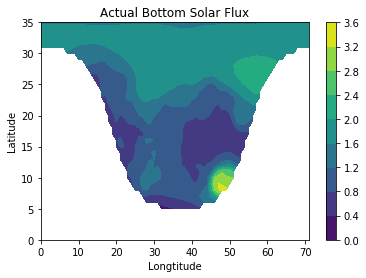

<Figure size 432x288 with 0 Axes>

In [28]:
plt.contourf(full_out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Actual")

### Plots for RMSE minimizing regressors:

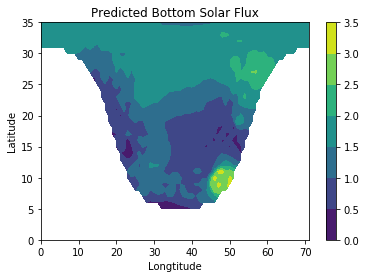

<Figure size 432x288 with 0 Axes>

In [29]:
plt.contourf(full_pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Predicted")

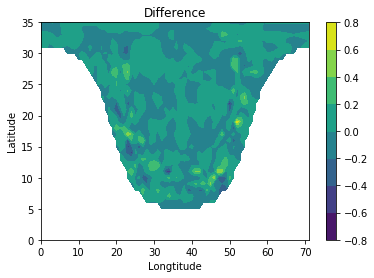

In [30]:
plt.contourf(full_pred_contour - full_out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

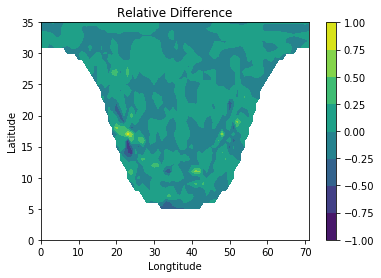

In [31]:
plt.contourf((full_pred_contour - full_out_contour)/full_out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show() #some massive relative errors at the edge

### Long-Height Plots at equator:

In [32]:
all_indices = total_in.index
ti_indices = all_indices[all_indices >= 5*36*72 + 18*72] 
ti_indices = ti_indices[ti_indices < 5*36*72 + 19*72] 
ti_indices #ith time snapshot indices for longtitude/height map, currently set to 6th time snapshot

Int64Index([14275, 14276, 14277, 14278, 14279, 14280, 14281, 14282, 14283,
            14284, 14285, 14286, 14287, 14288, 14289, 14290, 14291, 14292,
            14293, 14294, 14295, 14296, 14297, 14298, 14299, 14300, 14301,
            14302, 14303, 14304, 14305, 14306, 14307, 14308, 14309, 14310,
            14311],
           dtype='int64')

In [33]:
total_out = np.array(total_out)
height_out_contour = np.full((53, 72), np.nan)
height_pred_contour = np.full((53, 72), np.nan) #longtitude-height contours
for index in ti_indices:
    long_point = index%72
    height_out_contour[:,long_point] = total_out[np.where(all_indices == index)][0][::-1]
    height_pred_contour[:,long_point] = custom_out[np.where(all_indices == index)][0][::-1] #flips the height to look better

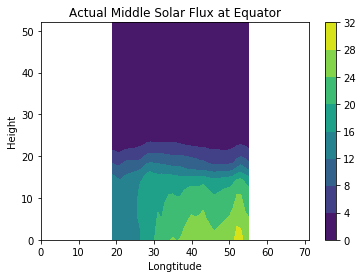

In [34]:
plt.contourf(height_out_contour)
plt.colorbar()
plt.title("Actual Middle Solar Flux at Equator")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()

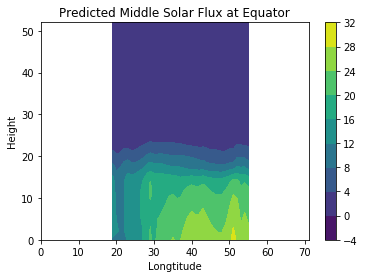

In [35]:
plt.contourf(height_pred_contour)
plt.colorbar()
plt.title("Predicted Middle Solar Flux at Equator")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()

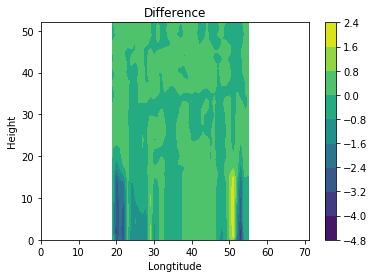

In [36]:
plt.contourf(height_pred_contour - height_out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()

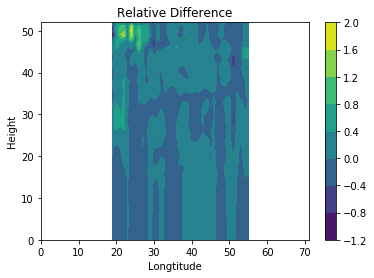

In [37]:
plt.contourf((height_pred_contour - height_out_contour)/height_out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()